# Genomics

Our first portfolio checkpoint will involve a genomics-themed project involving *Escherichia coli* (*E. coli*).
In the realm of biomedical research, *E. coli* is a foundational model organism and is characterized by its genetic simplicity and relevance in elucidating fundamental biological processes.

![E. coli animation](https://mir-s3-cdn-cf.behance.net/project_modules/disp/76ba5919588097.562dcebc4c912.gif)

As we embark on our genomics-themed project, the focal point shifts towards addressing a pressing global concern&mdash;antibiotic resistance.
The urgency surrounding antibiotic resistance has become increasingly palpable and poses a significant threat to public health worldwide.
The primary drivers of antibiotic resistance include practices such as the overuse and misuse of antibiotics, inadequate infection prevention and control, and the scarcity of new antibiotic developments.
The emergence of antibiotic-resistant strains, coupled with a dwindling arsenal of effective antibiotics, has propelled this issue to the forefront of medical challenges.

To tackle this multifaceted problem, we explore an innovative tool of a computational model designed to predict antibiotic susceptibility in *E. coli* infections.
At the core of our project lies the synergy of genomics and machine learning.
Armed with datasets containing whole-genome sequencing information and antibiotic susceptibility data, our approach seeks to train a model capable of predicting the antibiotics to which a particular *E. coli* strain may be susceptible.
Rapid and accurate predictions of antibiotic susceptibility have the potential to revolutionize antibiotic prescription practices, contributing significantly to the fight against antibiotic resistance.

## Data acquisition

The [National Database of Antibiotic Resistant Organisms (NDARO)](../../../data-sources/ndaro) provides a useful [web interface][ndaro-isolates] to browse pathogens that have annotated data concerning the antibiotic resistance profile.
Based on my selection criteria I found over than 3000 samples.

[ndaro-isolates]: https://www.ncbi.nlm.nih.gov/pathogens/isolates

In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import yaml
from datetime import datetime


load_dotenv()

True

In [2]:
CSV_PATH_ISOLATE = os.environ["GENOMICS_CHECKPOINT_CSV_PATH"]

DIR_FILES = "../../../files"
RC_JSON_PATH = os.path.join(DIR_FILES, "mpl-rc-params.json")
COLORS_PATH = os.path.join(DIR_FILES, "colors.yml")
DIRS_FONTS = [os.path.join(DIR_FILES, "files/fonts/roboto/")]

# Setup matplotlib style
with open(RC_JSON_PATH, "r", encoding="utf-8") as f:
    rc_params = json.load(f)
font_paths = mpl.font_manager.findSystemFonts(
    fontpaths=DIRS_FONTS, fontext='ttf'
)
for font_path in font_paths:
    mpl.font_manager.fontManager.addfont(font_path)
for key, params in rc_params.items():
    plt.rc(key, **params)

# Load colors
with open(COLORS_PATH, "r", encoding="utf-8") as f:
    COLORS_LIST = yaml.safe_load(f)["colors_list"]

df_isolate = pd.read_csv(CSV_PATH_ISOLATE)

In [3]:
print(df_isolate.columns)

Index(['#Organism group', 'Strain', 'Isolate identifiers', 'Serovar',
       'Isolate', 'Create date', 'Location', 'Isolation source',
       'Isolation type', 'AST phenotypes', 'Food origin', 'SNP cluster',
       'Min-same', 'Min-diff', 'BioSample', 'Assembly', 'AMR genotypes',
       'Computed types'],
      dtype='object')


In [4]:
print(df_isolate.iloc[0])

#Organism group                                      E.coli and Shigella
Strain                                                               NaN
Isolate identifiers                   "0000-0053-1977","60","SRS1016975"
Serovar                                                              NaN
Isolate                                                   PDT000077409.3
Create date                                         2015-12-01T23:21:05Z
Location                                                      USA:Boston
Isolation source                                                   blood
Isolation type                                                  clinical
AST phenotypes         amikacin=S,amoxicillin-clavulanic acid=I,ampic...
Food origin                                                          NaN
SNP cluster                                              PDS000003052.12
Min-same                                                             4.0
Min-diff                                           


Here, we generate a [histogram][mpl-hist] of when these samples were collected.

[mpl-hist]: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

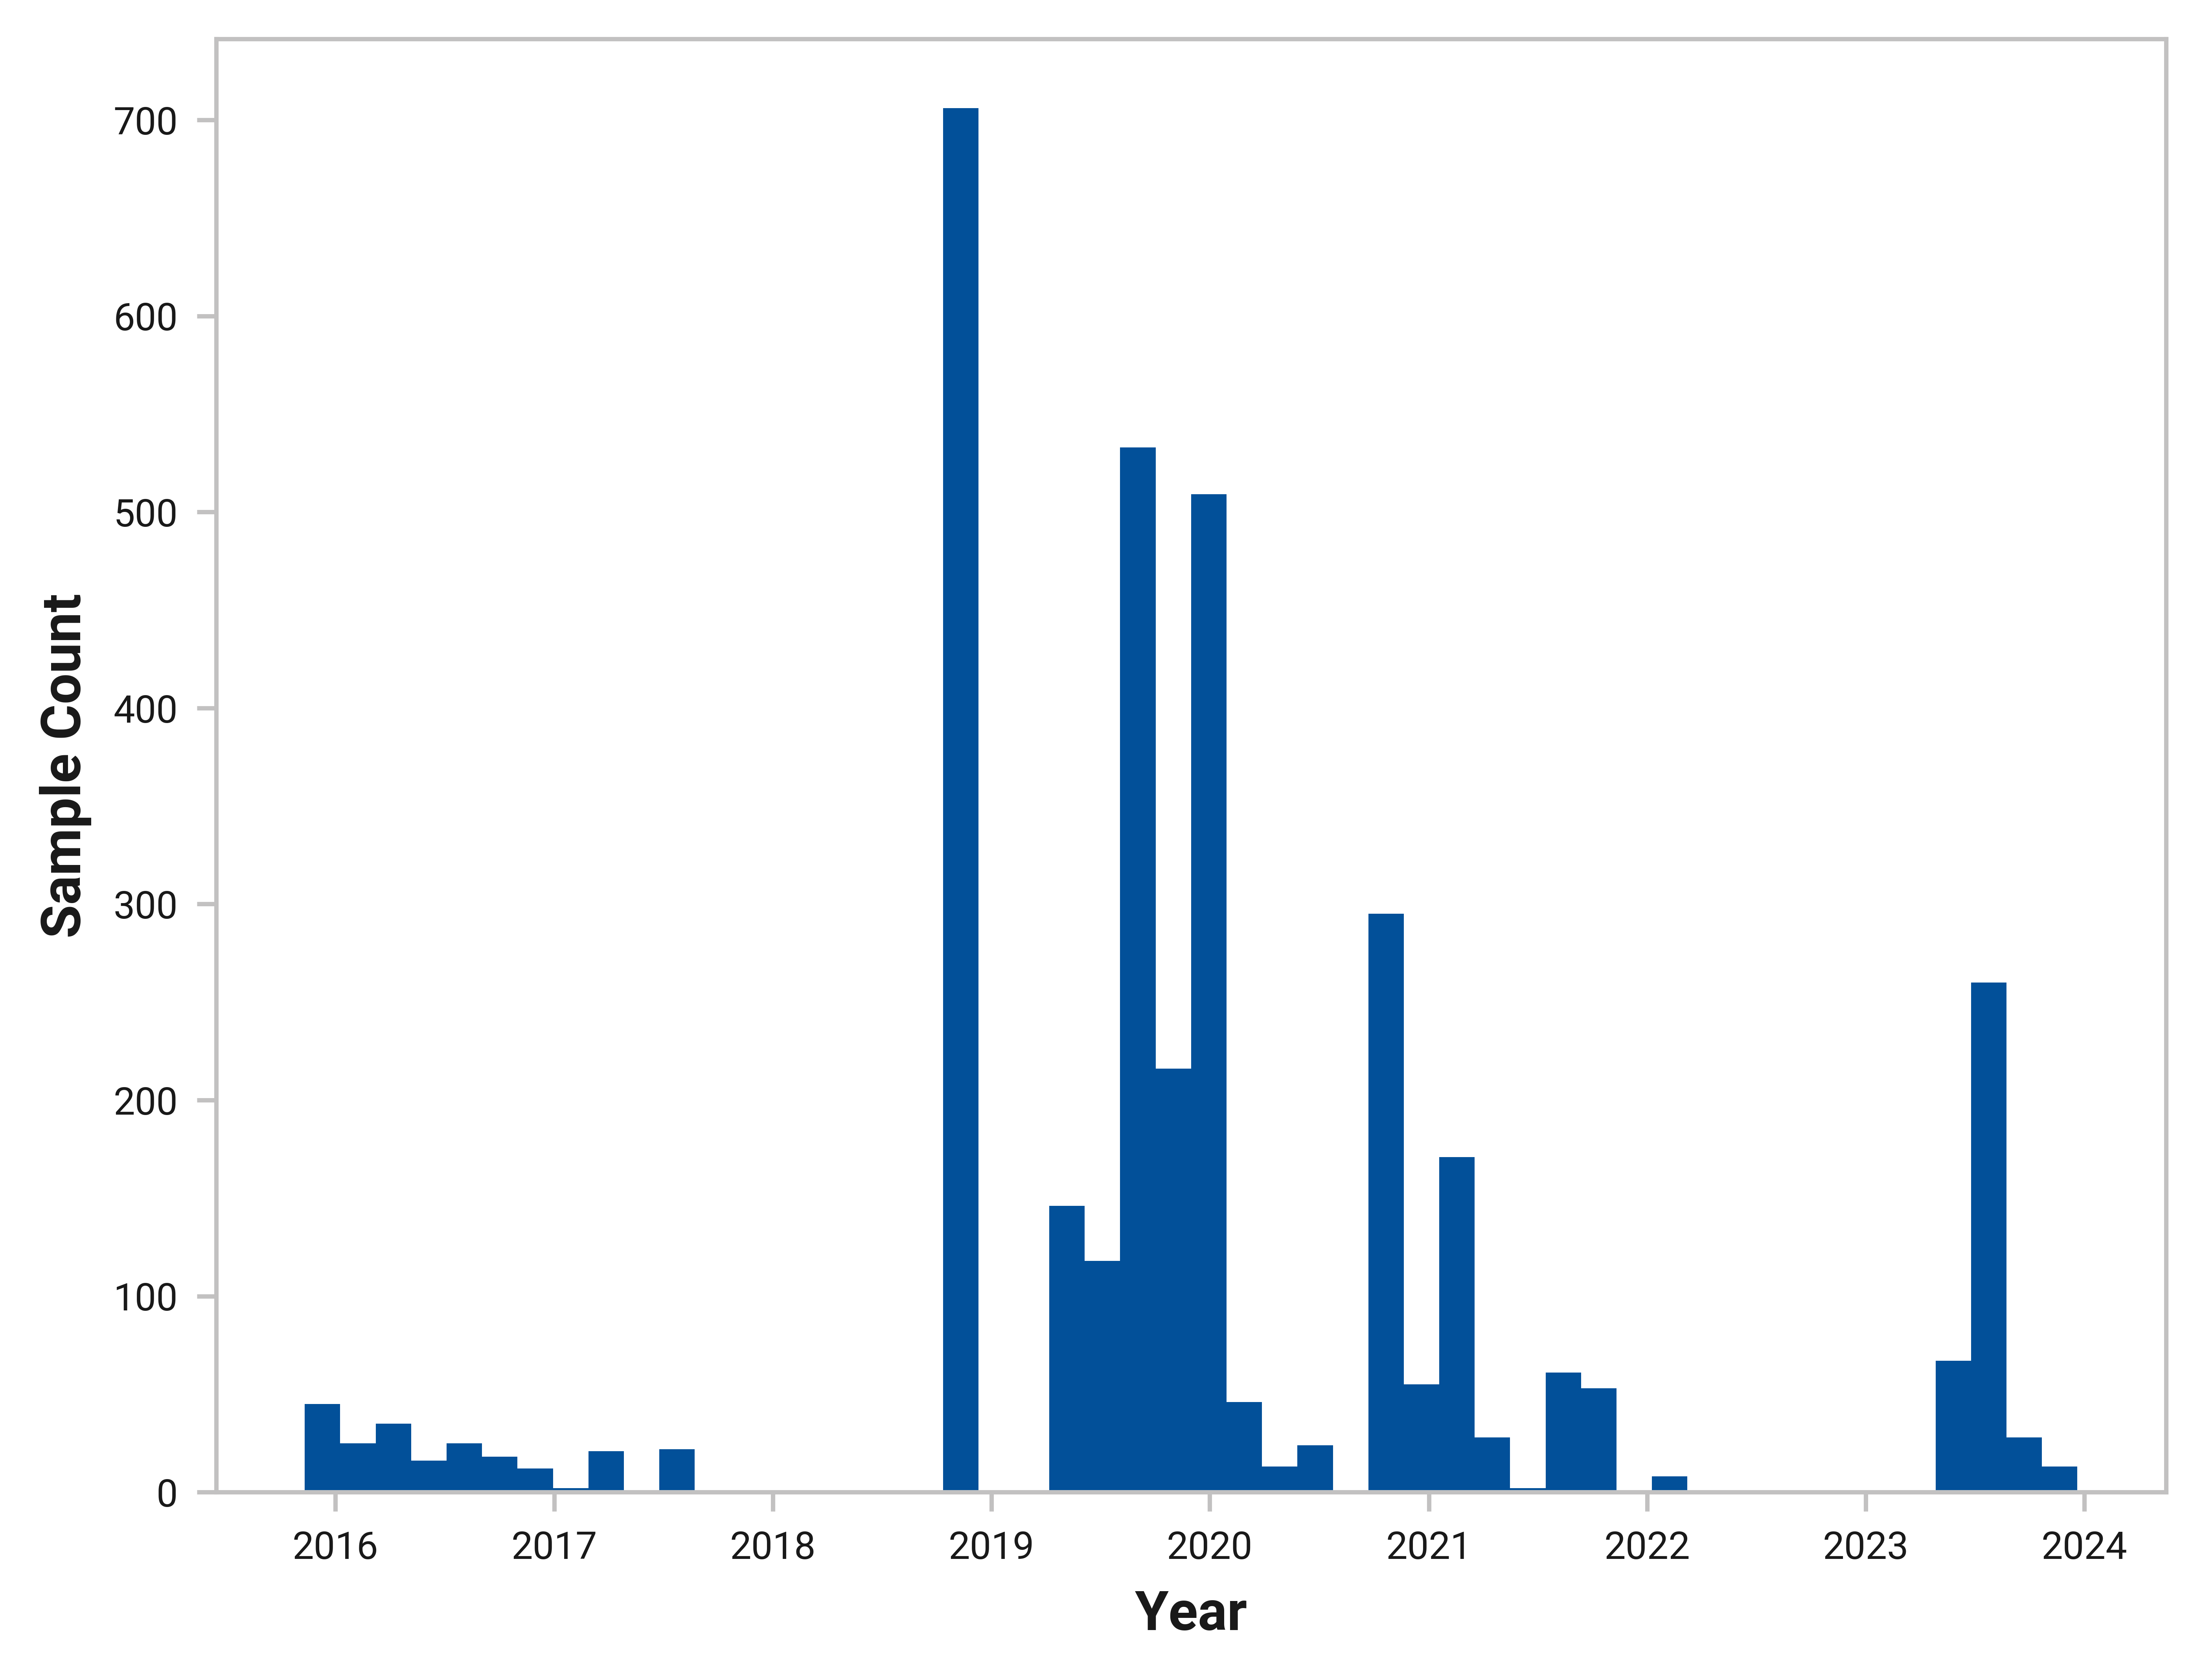

In [5]:
isolate_dates = df_isolate["Create date"].map(
    lambda dt: datetime.strptime(dt, "%Y-%m-%dT%H:%M:%SZ")
)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(isolate_dates, align="mid", bins=50, color=COLORS_LIST[0])

ax.set_xlabel("Year")
ax.set_ylabel("Sample Count")

plt.show()